<a href="https://colab.research.google.com/github/dsnnaveen/Face-Emotion-Recognition/blob/main/Face_Emotion_Recognition_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is face emotion recognisation for live class monitoring system

This is an Individulal project done by 
DSN Naveen Kumar


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Project Indroduction
The Indian education landscape has been undergoing rapid changes for the past 10 years owing to the advancement of web-based learning services, specifically, eLearning platforms.

Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market is growing on a rapid scale, there are major challenges associated with digital learning when compared with brick and mortar classrooms.

One of many challenges is how to ensure quality learning for students. Digital platforms might overpower physical classrooms in terms of content quality but when it comes to understanding whether students are able to grasp the content in a live class scenario is yet an open-end challenge.

In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who need special attention.

Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the mood. Because of this drawback, students are not focusing on content due to lack of surveillance.

While digital platforms have limitations in terms of physical surveillance but it comes with the power of data and machines which can work for you. It provides data in the form of video, audio, and texts which can be analysed using deep learning algorithms.

Deep learning backed system not only solves the surveillance issue, but it also removes the human bias from the system, and all information is no longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

In [2]:
# Getting the Data-Set from dropbox
!wget https://www.dropbox.com/s/si11cws2pyho1bp/archive.zip

--2022-05-09 06:31:48--  https://www.dropbox.com/s/si11cws2pyho1bp/archive.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/si11cws2pyho1bp/archive.zip [following]
--2022-05-09 06:31:49--  https://www.dropbox.com/s/raw/si11cws2pyho1bp/archive.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd89b2969fc7fbc80ed213fc219.dl.dropboxusercontent.com/cd/0/inline/Bk6mnCGXW0yaLJ6G1wyw1hN739MyuZJ4npwUl3gpkhjYB8H8nf_pJn-1_YK3NtOwi0ALZ5WklahRvBjP_UoW0shvAdMHmssGLsFrqCDM4xULwyCR4vCL6s2axu4e2PS83ABn2MFaNZuPqUbAv_Hfo_TbLX_5JxAlaO1XhYHpaqzs7Q/file# [following]
--2022-05-09 06:31:49--  https://ucd89b2969fc7fbc80ed213fc219.dl.dropboxusercontent.com/cd/0/inline/Bk6mnCGXW0yaLJ6G1wyw1hN739MyuZJ4npwUl3gpkhjYB8H8nf_pJn-1_YK3NtOwi0ALZ

In [3]:
# Unzipping the dataset
!unzip  -q "/content/archive.zip" 

In [4]:
# Importing Neccessary Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler

In [5]:
# locating path and creating classes from dataset
trainpath=Path("/content/train")
Classes=[str(list(trainpath.glob("*"))[i]).split('/')[-1] for i in range(len(list(trainpath.glob("*"))))]

In [6]:
# Reading sample image from dataset
img_array=cv2.imread('/content/train/sad/Training_49187727.jpg')

In [7]:
# Reading sample image from dataset
img_array=cv2.imread('/content/train/sad/Training_49187727.jpg')

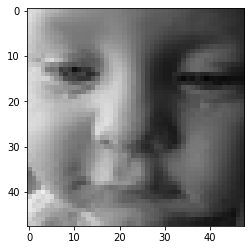

In [8]:
# displaying the image
plt.imshow(img_array)
plt.show()

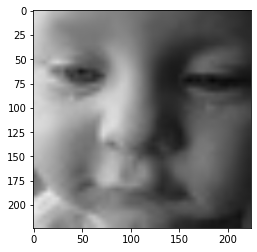

In [9]:
# resizing the image so to make compatible with input of mobilenetv2 model
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
# converting the path to string type
pathlist=list(map(lambda x: str(x), list(trainpath.glob("*/*"))))

In [11]:
# loading the training data
training_data=[]
for path in pathlist:
  img_array=cv2.imread(path)
  new_array=cv2.resize(img_array,(img_size,img_size))
  Class_label=Classes.index(path.split('/')[-2])
  training_data.append([new_array,Class_label])

In [12]:
# shuffling the data
import random
random.shuffle(training_data)
training_data=training_data[:5000]

In [13]:
ld=[]
for i in range(len(training_data)):
   ld.append(training_data[i][1])
np.unique(ld,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]),
 array([ 818,  544, 1270,  892,  681,  727,   68]))

In [14]:
# creating dependent and independent variable
X=[]
y=[]
for feature, label in training_data:
  X.append(feature)
  y.append(label)

In [ ]:
# normalizing the data
X=np.array(X).reshape(-1,img_size,img_size,3)/255
y=np.array(y)